In [47]:
# Dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = 'clinicaltrial_data.csv'
data = pd.read_csv(data)
data.head(2)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0


In [3]:
data.tail(2)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
1891,x773,45,58.634971,4
1892,b879,45,72.555239,2


In [4]:
data.columns = ['mouse', 'timepoint', 'volume', 'sites']

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
mouse        1893 non-null object
timepoint    1893 non-null int64
volume       1893 non-null float64
sites        1893 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 59.2+ KB


In [6]:
drugs = 'mouse_drug_data.csv'
drugs = pd.read_csv(drugs)
drugs.head(2)

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn


In [7]:
drugs.columns

Index(['Mouse ID', 'Drug'], dtype='object')

In [8]:
drugs.columns = ['mouse', 'drug']

In [9]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 2 columns):
mouse    250 non-null object
drug     250 non-null object
dtypes: object(2)
memory usage: 4.0+ KB


In [10]:
treatment_response = pd.merge(data, drugs, on= 'mouse')
treatment_response.head(2)

,mouse,timepoint,volume,sites,drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin


In [11]:
treatment_response.drug.unique()

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Propriva', 'Zoniferol', 'Placebo', 'Ceftamin'],
      dtype=object)

In [12]:
treatment_response.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1906 entries, 0 to 1905
Data columns (total 5 columns):
mouse        1906 non-null object
timepoint    1906 non-null int64
volume       1906 non-null float64
sites        1906 non-null int64
drug         1906 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 89.3+ KB


In [13]:
treatment_response.head(5)

,mouse,timepoint,volume,sites,drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [14]:
treatment_response.drop(['sites', 'mouse'], axis = 1, inplace = True)
treatment_response.head(5)

,timepoint,volume,drug
0,0,45.000000,Capomulin
1,5,45.651331,Capomulin
2,10,43.270852,Capomulin
3,15,43.784893,Capomulin
4,20,42.731552,Capomulin


In [15]:
pd.pivot_table(treatment_response, 'volume', 'timepoint', 'drug')

drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [16]:
df = pd.pivot_table(treatment_response, 'volume', 'timepoint', 'drug')
df.columns

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='drug')

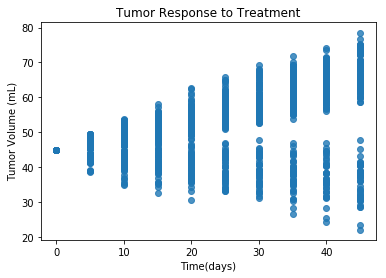

In [17]:
vis0 = sns.regplot(x= treatment_response['timepoint'], y= treatment_response['volume'],fit_reg= False)
vis0.set(xlabel='Time(days)', ylabel='Tumor Volume (mL)', title= 'Tumor Response to Treatment')
plt.show()

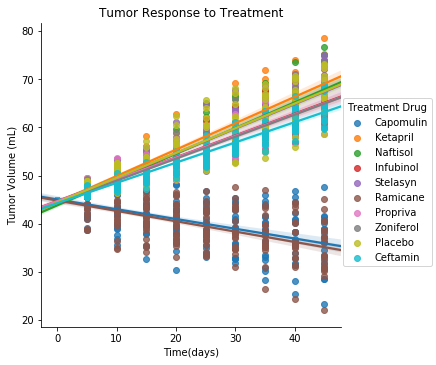

In [18]:
vis1 = sns.lmplot(x= 'timepoint', y= 'volume', hue= 'drug', data=treatment_response, fit_reg=True)
vis1.set(xlabel='Time(days)', ylabel='Tumor Volume (mL)', title= 'Tumor Response to Treatment')
vis1._legend.set_title('Treatment Drug')
plt.show()

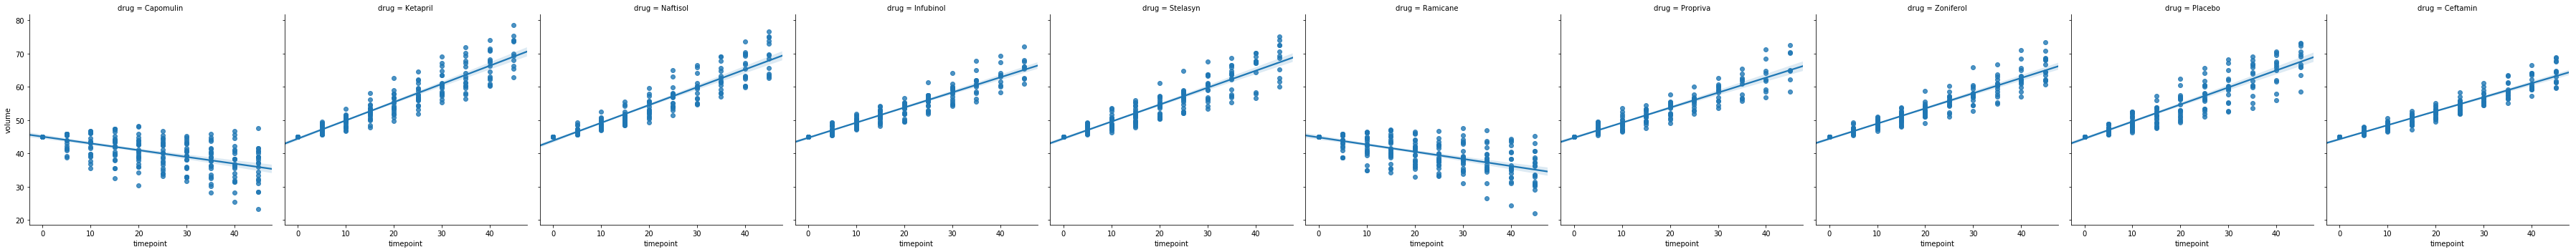

In [19]:
vis2= sns.lmplot(x= 'timepoint', y= 'volume', col="drug", data=treatment_response, fit_reg=True)

In [20]:
tr = treatment_response[(treatment_response["drug"]=='Capomulin') 
                        |(treatment_response["drug"] == 'Infubinol') 
                        | (treatment_response["drug"] == 'Ketapril') 
                        |(treatment_response["drug"] == 'Placebo')]

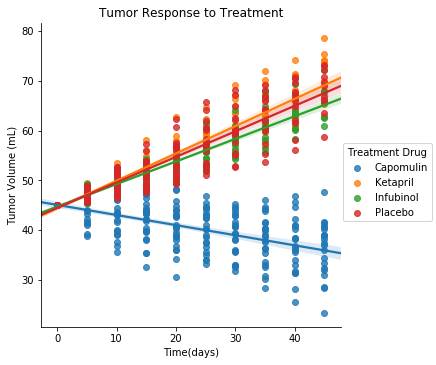

In [21]:
#plot for 5 drugs show in hwk example

vis3 = sns.lmplot(x= 'timepoint', y= 'volume', hue= 'drug', data=tr, fit_reg=True)
vis3.set(xlabel='Time(days)', ylabel='Tumor Volume (mL)', title= 'Tumor Response to Treatment')
vis3._legend.set_title('Treatment Drug')
plt.show()

In [23]:
#Creating a scatter plot that shows how the number of metastatic sites changes over time for each treatment.
meta_response= pd.merge(data, drugs, on= 'mouse')
meta_response.head(5)

,mouse,timepoint,volume,sites,drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [24]:
meta_response = meta_response[(meta_response["drug"]=='Capomulin') 
                              |(meta_response["drug"] == 'Infubinol') 
                              | (meta_response["drug"] == 'Ketapril') 
                              |(meta_response["drug"] == 'Placebo')]
meta_response.head(5)

,mouse,timepoint,volume,sites,drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [25]:
meta_response.tail(5)

,mouse,timepoint,volume,sites,drug
1901,m601,25,33.118756,1,Capomulin
1902,m601,30,31.758275,1,Capomulin
1903,m601,35,30.834357,1,Capomulin
1904,m601,40,31.378045,1,Capomulin
1905,m601,45,28.430964,1,Capomulin


In [26]:
meta_response.sites.unique()

array([0, 1, 2, 3, 4])

In [27]:
pd.pivot_table(meta_response, 'sites', 'timepoint', 'drug')

drug,Capomulin,Infubinol,Ketapril,Placebo
timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


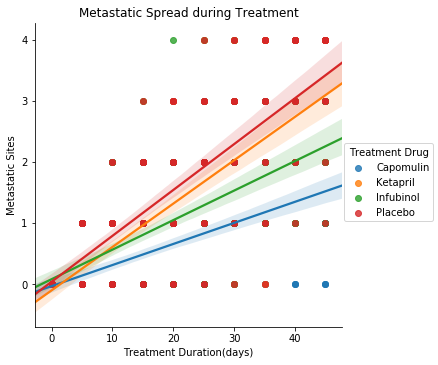

In [28]:
#Creating a scatter plot that shows how the number of metastatic sites changes over time for each treatment.
vis3 = sns.lmplot(x= 'timepoint', y= 'sites', hue= 'drug', data=meta_response)
vis3.set(xlabel='Treatment Duration(days)', ylabel='Metastatic Sites', title= 'Metastatic Spread during Treatment')
vis3._legend.set_title('Treatment Drug')
plt.show()

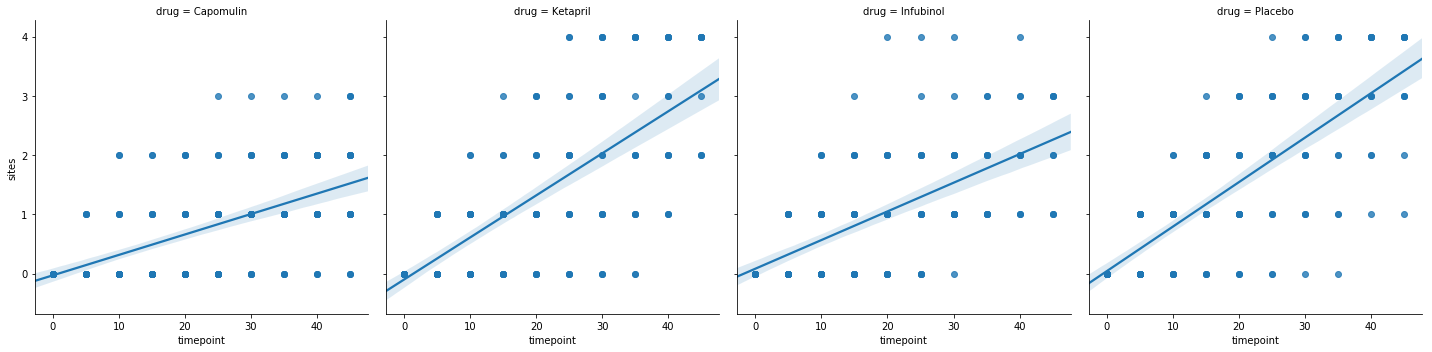

In [29]:
vis4= sns.lmplot(x= 'timepoint', y= 'sites', col="drug", data=meta_response, fit_reg=True)

In [30]:
#Use error bars and mean spread for next visualization
avg = pd.DataFrame(meta_response.groupby(['drug', 'timepoint']).mean()['sites'])

In [31]:
avg.head()

sites
drug      timepoint          
Capomulin 0          0.000000
          5          0.160000
          10         0.320000
          15         0.375000
          20         0.652174

In [32]:
#Use error bars and mean for next visualization
err = pd.DataFrame(meta_response.groupby(['drug', 'timepoint']).sem()['sites'])

In [33]:
err.head()

sites
drug      timepoint          
Capomulin 0          0.000000
          5          0.074833
          10         0.125433
          15         0.132048
          20         0.161621

In [34]:
avg = avg.unstack(level=0)
avg.columns = avg.columns.get_level_values(level= 1)
avg

drug,Capomulin,Infubinol,Ketapril,Placebo
timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


In [35]:
err = err.unstack(level= 0)
err.columns = err.columns.get_level_values(level= 1)
err

drug,Capomulin,Infubinol,Ketapril,Placebo
timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064
25,0.181818,0.265753,0.288275,0.263888
30,0.172944,0.227823,0.347467,0.300264
35,0.169496,0.224733,0.361418,0.341412
40,0.175610,0.314466,0.315725,0.297294


In [44]:
import matplotlib.style as style
style.available

['_classic_test',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2']

In [45]:
style.use('fivethirtyeight')

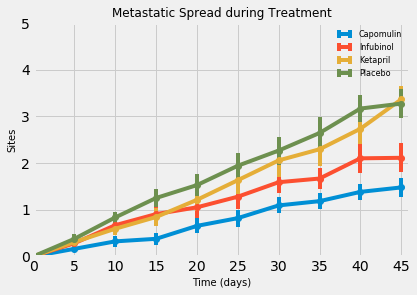

In [63]:
#Plot with error bars
#first plot sites
plt.title('Metastatic Spread during Treatment', fontsize = '12')
plt.xlabel('Time (days)', fontsize = '10')
plt.ylabel('Sites', fontsize = '10')
plt.xticks(np.arange(0, avg.index.max()+1 , 5)) 
plt.xlim(0, avg.index.max() + 1) 
plt.ylim(0,5)

# x axis is timepoint
xvals = avg.index
markers = ['o', 'o', 'o', 'o']


#start loop for standard error
count = 0


for c in avg.columns:
    plt.errorbar(xvals, 
                 avg[c], 
                 err[c], #std error
                 marker =  markers[count])
    count += 1
    
legend = plt.legend(numpoints = 2,
                frameon = False, 
                markerscale = 0.2, 
                edgecolor = 'b', 
                fontsize = '8')
plt.show()


In [64]:
#Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
meta_response.head(5)

,mouse,timepoint,volume,sites,drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [68]:
meta_response.mouse.index.max()

1905

In [65]:
mouse_count= meta_response.groupby(['drug', 'timepoint']).count()['mouse']
mouse_count = mouse_count.unstack(level = 0)
mouse_count

drug,Capomulin,Infubinol,Ketapril,Placebo
timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19
25,22,18,19,17
30,22,17,18,15
35,22,12,17,14
40,21,10,15,12


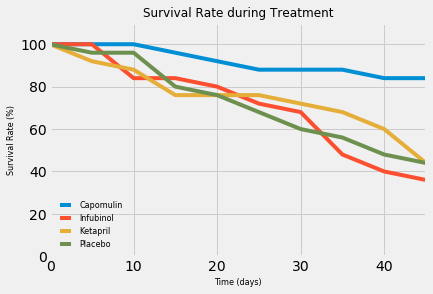

In [87]:


#Plot survival rates

plt.title('Survival Rate during Treatment', fontsize = '12')
plt.xlabel('Time (days)', fontsize = '8')
plt.ylabel('Survival Rate (%)', fontsize = '8')
plt.xlim(0, mouse_count.index.max()) 
plt.ylim(0,110)

# x axis is timepoint
xvals = mouse_count.index


#y axis is survival rate, calculate rate in loop, start at timepoint 0 [loc[0,c]]
count = 0



for c in mouse_count:
    yvals = ((mouse_count[c]/mouse_count.loc[0,c]) * 100) 
    plt.plot(xvals, yvals)
    count += 1
    
legend = plt.legend(numpoints = 2,
                frameon = False, 
                markerscale = 0.2, 
                edgecolor = 'b', 
                fontsize = '8')
plt.show()

In [93]:
#Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.
avg.head()

drug,Capomulin,Infubinol,Ketapril,Placebo
timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316


In [95]:
meta_response.head()

,mouse,timepoint,volume,sites,drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [108]:
meta_response.drop(['sites', 'mouse'], axis = 1, inplace = True)

In [109]:
meta_response.head()

,timepoint,volume,drug
0,0,45.000000,Capomulin
1,5,45.651331,Capomulin
2,10,43.270852,Capomulin
3,15,43.784893,Capomulin
4,20,42.731552,Capomulin


In [115]:
vol_pct = (((meta_response.volume[0]- meta_response.volume[45])/meta_response.volume[0])*100)

In [ ]:
# three observations
# Survival rate was better under Capomulin.
# Ketapril appears to increase tumor volume. 
# Ramicane had largest decrease in tumor volume. 

# Begin Extra Lines
times = treatment_response.groupby(['timepoint', 'drug'])
type(times)

In [ ]:
# Remove the rows with missing values in horsepower
car_data = car_data.loc[car_data['horsepower'] != "?"]
car_data.head()

times.head()

treatment_response.head(2)

#data.set_index('mouse', inplace= True)
#drugs.set_index('mouse', inplace= True)

joined= data.join(drugs)
joined.head()

joined.set_index('drug')

joined.columns

joined.drop(['sites'], axis = 1, inplace = True)

joined.set_index('drug')
joined.info()

joined.drug.unique()

df= joined

type(df)

In [23]:
df.head(2)

,timepoint,volume,drug
mouse,,,
a203,0,45.000000,Infubinol
a203,5,48.508468,Infubinol


#df.pivot(index="timepoint", columns= "drug", values= "volume")

In [16]:
#treatment_response = pd.merge(data, drugs, on= 'mouse')
#print(treatment_response)


* Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
* Creating a scatter plot that shows how the number of [metastatic](https://en.wikipedia.org/wiki/Metastasis) (cancer spreading) sites changes over time for each treatment.
* Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
* Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.
